In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers.legacy import Adam

# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values from [0, 255] to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to add a channel dimension (required by keras)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the model architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_accuracy)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-14 00:06:44.656402: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-14 00:06:44.656422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2023-02-14 00:06:44.892527: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-14 00:06:45.032650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 14s 7ms/step - loss: 0.2676 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1146 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0904 - accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0784 - accuracy: 0.9754
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0681 - accuracy: 0.9790


2023-02-14 00:07:51.774236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test accuracy: 0.9828000664710999


1/1 [==============================] - 0s 15ms/step


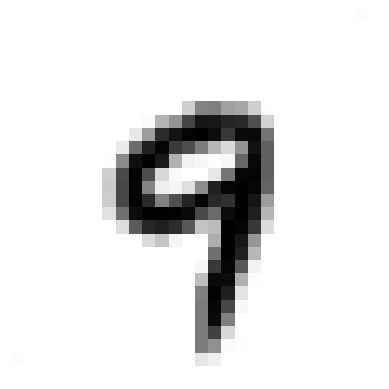

Predicted digit: 9


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import PIL


# Load an example image
img = keras.preprocessing.image.load_img("B7BC09C5-650F-4B34-820C-9D4D373E7C40.jpg", color_mode="grayscale", target_size=(28, 28))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Use the model to make a prediction
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions[0])


# Plot the image and show the prediction
plt.imshow(img_array[0, ..., 0], cmap='gray')
plt.axis('off')
plt.show()
print("Predicted digit:", predicted_digit)
